In [172]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 700)
data_df=pd.read_csv("C:\\Users\\intae\\Desktop\\공모전\\동작구.csv",encoding='euc-kr')
data_df.head(5)

,도로명,안전비상벨 개수,CCTV 카메라 개수,담배소매인 지정 업소 개수,음식점 개수,보안등 개수,아파트 세대 수,과속방지턱 개수,금연구역 개수,문화유통업소 개수,임대주택 개수
0,남부순환로,0,0,6,15,0,0,1,53,4,63
1,동작대로,2,11,15,73,14,0,3,196,19,6
2,시흥대로,0,0,6,28,10,0,0,56,5,132
3,올림픽대로,0,0,0,0,0,0,0,0,0,0
4,보라매로,2,8,8,53,15,494,0,102,7,69


C:\Users\intae\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\intae\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\intae\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\intae\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\intae\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48296 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\intae\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from c

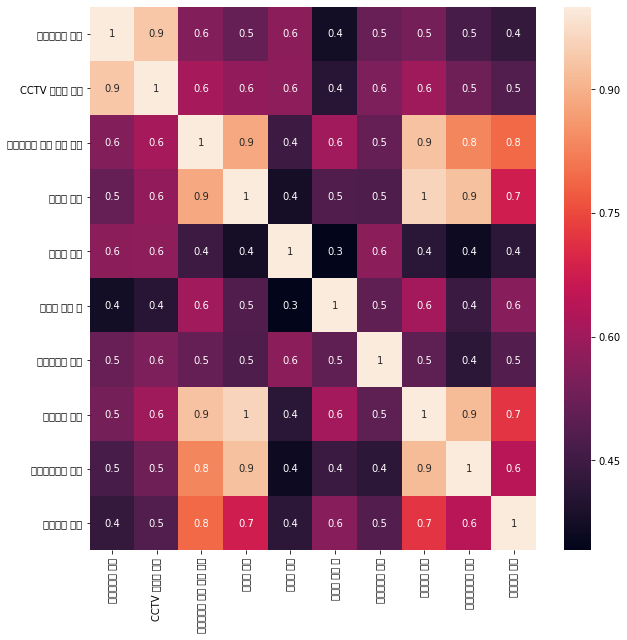

In [173]:
corr=data_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.1g')

In [174]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
tsvd=TruncatedSVD(n_components=2)

data_df=data_df.drop(['도로명'], axis=1,inplace=False)
data_df_scaled=np.log1p(data_df)
data_df_scaled_standard=StandardScaler().fit_transform(data_df_scaled)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(data_df_scaled_standard)
print(kmeans.labels_)

[2 2 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 1 0 1 1 1 1 1 2 1 1
 1 1 0 0 1 1 1 1 1 0 0 1 0 2 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 2 0 2
 1 1 0 0 1 0 0 1 2 1 1 0 1 1 0 1 0 0 1 0 0 1 2 1 0 1 1 1 2 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 2 1 0 1 2 1 0 0 0 2 0 1 2 2 2 1 2 0 1 1 0 2 1
 0 1 1 1 0 0 0 1 1 0 1 0 0 2 1 1 1 1 1 1 0 1 1 1 0 1 2 0 0 1 1 1 1 1 2 1 0
 0 0 1 1 1 1 1 1 1 1 2 1 1 0 1 0 0 1 0 1 0 1 1 0 2 2 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 2 1 0 1 1 1 1 0 0 1 1 2 0 1 0 1 1 1 1 0 1 2 1 2 1 1 2 2 0 0 0 0 1
 0 0 0 1 2 0 1 1 1 0 2 0 0 1 1 0 0 1 1 0 0 1 2 0 1 1 0 1 1 1 1 1 2 1 2 1 0
 2 0 1 0 1 2 0 1 0 1 1 1 1 0 0 0 2 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 2 1
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 2 0 1 0 1 2 2 1 1 2 0 1 1 2 1 0 1 1 1 1 0 2
 1 1 1 1 1 0 0 2 1 1 1 1 1 0 1 0 0 0 1 2 1 2 0 0 1 2 1 2 1 2 1 1 1 0 1 0 1
 2 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 2 0 0 1 1 1 0 1 2 2 0 0 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 0 0 

In [175]:
data_df=pd.DataFrame(data=data_df_scaled_standard,columns=['안전비상벨','cctv','담배소매인','음식점','보안등','아파트 세대','과속방지턱',\
                                                          '금연구역','문화유통업','임대주택'])

In [176]:
data_df['clusters']=kmeans.labels_

In [177]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed=pca.fit_transform(data_df)

data_df['pca_x'] = pca_transformed[:,0]
data_df['pca_y'] = pca_transformed[:,1]
data_df.head(3)


,안전비상벨,cctv,담배소매인,음식점,보안등,아파트 세대,과속방지턱,금연구역,문화유통업,임대주택,clusters,pca_x,pca_y
0,-0.771722,-0.854712,2.449736,1.596207,-2.364536,-0.342587,0.203227,2.156544,2.207327,1.369184,2,2.245451,3.788627
1,1.410967,1.797116,3.748372,2.853724,0.545716,-0.342587,1.080405,3.136699,4.461439,-0.040947,2,6.433621,2.827725
2,-0.771722,-0.854712,2.449736,2.084530,0.212403,-0.342587,-0.673951,2.197491,2.503782,1.835282,2,3.038482,3.044861


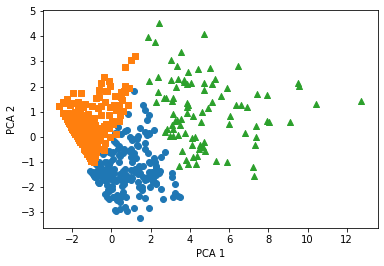

In [178]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = data_df[data_df['clusters']==0].index
marker1_ind = data_df[data_df['clusters']==1].index
marker2_ind = data_df[data_df['clusters']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=data_df.loc[marker0_ind,'pca_x'], y=data_df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=data_df.loc[marker1_ind,'pca_x'], y=data_df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=data_df.loc[marker2_ind,'pca_x'], y=data_df.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [179]:
data1_df=pd.read_csv("C:\\Users\\intae\\Desktop\\공모전\\동작구.csv",encoding='euc-kr')
data1_df=data1_df[['도로명']]
data_df=pd.concat([data1_df,data_df],axis=1)
data_df

,도로명,안전비상벨,cctv,담배소매인,음식점,보안등,아파트 세대,과속방지턱,금연구역,문화유통업,임대주택,clusters,pca_x,pca_y
0,남부순환로,-0.771722,-0.854712,2.449736,1.596207,-2.364536,-0.342587,0.203227,2.156544,2.207327,1.369184,2,2.245451,3.788627
1,동작대로,1.410967,1.797116,3.748372,2.853724,0.545716,-0.342587,1.080405,3.136699,4.461439,-0.040947,2,6.433621,2.827725
2,시흥대로,-0.771722,-0.854712,2.449736,2.084530,0.212403,-0.342587,-0.673951,2.197491,2.503782,1.835282,2,3.038482,3.044861
3,올림픽대로,-0.771722,-0.854712,-0.607111,-0.680403,-2.364536,-0.342587,-0.673951,-0.864444,-0.409615,-1.280902,1,-2.665650,1.225048
4,보라매로,1.410967,1.490109,2.844528,2.595006,0.615074,2.965213,-0.673951,2.645588,2.971552,1.426286,2,5.911209,1.929194
5,솔밭로,2.425860,1.882535,1.118708,0.917410,0.545716,1.874615,2.239971,1.186451,0.717441,-0.255351,2,4.103843,-0.334275
6,양녕로,3.802983,2.998766,2.207579,2.515224,1.136833,2.532887,1.362793,2.395165,2.503782,1.379063,2,7.307021,-0.323549
7,노들로,-0.771722,1.882535,2.207579,2.348586,-2.364536,-0.342587,-0.673951,1.573316,-0.409615,-1.280902,0,1.165712,1.815164
8,대림로,0.605401,0.624705,2.207579,2.238942,-0.438991,-0.342587,0.716343,2.001447,2.971552,0.444697,2,3.893601,2.562804
9,여의대방로,3.094352,2.443968,3.296450,2.784292,1.290619,3.804613,1.080405,3.068352,2.503782,1.810865,2,8.032970,0.601743


In [180]:
clusters_df=pd.DataFrame(columns=['cluster 개수','안전비상벨 개수','CCTV 카메라 개수','문화유통업소 개수','보안등 개수','과속방지턱 개수',\
                  '음식점 개수','담배소매인 지정 업소 개수','금연구역 개수','임대주택 개수','아파트 세대 수'])
for i in list(range(3)):
    index=data_df[data_df['clusters']==i].index
    data1_df=pd.read_csv("C:\\Users\\intae\\Desktop\\공모전\\동작구.csv",encoding='euc-kr')
    data1_df=data1_df[['안전비상벨 개수','CCTV 카메라 개수','문화유통업소 개수','보안등 개수','과속방지턱 개수',\
                  '음식점 개수','담배소매인 지정 업소 개수','금연구역 개수','임대주택 개수','아파트 세대 수']]
    data1_df=data1_df.loc[index]
    summm=data_df[data_df['clusters']==i]['도로명'].count()
    print(summm)
    clusters_df.loc[i,'cluster 개수']=summm
    for column in data1_df.columns:
        summ =data1_df[column].sum().sum()
        print('cluster {0}에서 칼럼 {1}의 count'.format(i,column))
        print(summ)
        clusters_df.loc[i,column] =summ

clusters_df

206
cluster 0에서 칼럼 안전비상벨 개수의 count
259
cluster 0에서 칼럼 CCTV 카메라 개수의 count
949
cluster 0에서 칼럼 문화유통업소 개수의 count
50
cluster 0에서 칼럼 보안등 개수의 count
3548
cluster 0에서 칼럼 과속방지턱 개수의 count
334
cluster 0에서 칼럼 음식점 개수의 count
529
cluster 0에서 칼럼 담배소매인 지정 업소 개수의 count
138
cluster 0에서 칼럼 금연구역 개수의 count
857
cluster 0에서 칼럼 임대주택 개수의 count
5495
cluster 0에서 칼럼 아파트 세대 수의 count
5850
388
cluster 1에서 칼럼 안전비상벨 개수의 count
36
cluster 1에서 칼럼 CCTV 카메라 개수의 count
106
cluster 1에서 칼럼 문화유통업소 개수의 count
38
cluster 1에서 칼럼 보안등 개수의 count
2458
cluster 1에서 칼럼 과속방지턱 개수의 count
119
cluster 1에서 칼럼 음식점 개수의 count
359
cluster 1에서 칼럼 담배소매인 지정 업소 개수의 count
63
cluster 1에서 칼럼 금연구역 개수의 count
544
cluster 1에서 칼럼 임대주택 개수의 count
3168
cluster 1에서 칼럼 아파트 세대 수의 count
2780
91
cluster 2에서 칼럼 안전비상벨 개수의 count
200
cluster 2에서 칼럼 CCTV 카메라 개수의 count
802
cluster 2에서 칼럼 문화유통업소 개수의 count
475
cluster 2에서 칼럼 보안등 개수의 count
2495
cluster 2에서 칼럼 과속방지턱 개수의 count
621
cluster 2에서 칼럼 음식점 개수의 count
3376
cluster 2에서 칼럼 담배소매인 지정 업소 개수의 count
513
cluster 2에서 칼럼 금연구역 개수의 co

,cluster 개수,안전비상벨 개수,CCTV 카메라 개수,문화유통업소 개수,보안등 개수,과속방지턱 개수,음식점 개수,담배소매인 지정 업소 개수,금연구역 개수,임대주택 개수,아파트 세대 수
0,206.0,259.0,949.0,50.0,3548.0,334.0,529.0,138.0,857.0,5495.0,5850.0
1,388.0,36.0,106.0,38.0,2458.0,119.0,359.0,63.0,544.0,3168.0,2780.0
2,91.0,200.0,802.0,475.0,2495.0,621.0,3376.0,513.0,5408.0,6412.0,47962.0


In [181]:
clusters_mean_df=pd.DataFrame(columns=[])
for ind in list(range(3)):
    for col in np.arange(start=1,stop=11):
        a=np.round((clusters_df.iloc[ind,col]/clusters_df.iloc[ind,0]),3)
        clusters_mean_df.loc[ind,col-1]=a

clusters_mean_df.columns = ['평균 안전비상벨 개수','평균 CCTV 카메라 개수','평균 문화유통업소 개수','평균 보안등 개수',\
                           '평균 과속방지턱 개수','평균 음식점 개수','평균 담배소매인 지정 업소 개수','평균 금연구역 개수',\
                           '평균 임대주택 개수','평균 아파트 세대 수']
clusters_mean_df

,평균 안전비상벨 개수,평균 CCTV 카메라 개수,평균 문화유통업소 개수,평균 보안등 개수,평균 과속방지턱 개수,평균 음식점 개수,평균 담배소매인 지정 업소 개수,평균 금연구역 개수,평균 임대주택 개수,평균 아파트 세대 수
0,1.257,4.607,0.243,17.223,1.621,2.568,0.670,4.160,26.675,28.398
1,0.093,0.273,0.098,6.335,0.307,0.925,0.162,1.402,8.165,7.165
2,2.198,8.813,5.220,27.418,6.824,37.099,5.637,59.429,70.462,527.055


In [182]:
# 각 피처별 0번 지역 대비 1번 지역 비율

clusters_mean_sel_df=clusters_mean_df[['평균 안전비상벨 개수','평균 CCTV 카메라 개수','평균 보안등 개수',\
                                          '평균 임대주택 개수','평균 아파트 세대 수']]
summs=[]
for ind in list(range(3)):
    summ=clusters_mean_sel_df.iloc[ind,3]+clusters_mean_sel_df.iloc[ind,4]
    summs.append(summ)
clusters_mean_sel_df['추정 가구 수']=summs
clusters_mean_sel_df

C:\Users\intae\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,평균 안전비상벨 개수,평균 CCTV 카메라 개수,평균 보안등 개수,평균 임대주택 개수,평균 아파트 세대 수,추정 가구 수
0,1.257,4.607,17.223,26.675,28.398,55.073
1,0.093,0.273,6.335,8.165,7.165,15.330
2,2.198,8.813,27.418,70.462,527.055,597.517


In [183]:
clusters_mean_sel_df=clusters_mean_sel_df.drop(2,inplace=False)
clusters_mean_sel_df=clusters_mean_sel_df.drop(['평균 임대주택 개수','평균 아파트 세대 수'],inplace=False,axis=1)
clusters_mean_sel_df

,평균 안전비상벨 개수,평균 CCTV 카메라 개수,평균 보안등 개수,추정 가구 수
0,1.257,4.607,17.223,55.073
1,0.093,0.273,6.335,15.330


In [184]:
pers=[]
for iter_ in list(range(4)):
    per=str(np.round((clusters_mean_sel_df.iloc[1,iter_]/clusters_mean_sel_df.iloc[0,iter_])*100,3))+str('%')
    pers.append(per)
clusters_mean_sel_df.loc[2]=pers
clusters_mean_sel_df

,평균 안전비상벨 개수,평균 CCTV 카메라 개수,평균 보안등 개수,추정 가구 수
0,1.257,4.607,17.223,55.073
1,0.093,0.273,6.335,15.33
2,7.399%,5.926%,36.782%,27.836%


In [185]:
index=data_df[data_df['clusters']==1].index
data1_df=pd.read_csv("C:\\Users\\intae\\Desktop\\공모전\\동작구.csv",encoding='euc-kr')
data2_df=data1_df.loc[index]
data2_df.columns = ['도로명','안전비상벨 개수','CCTV 카메라 개수','문화유통업소 개수','보안등 개수',\
                           '과속방지턱 개수','음식점 개수','담배소매인 지정 업소 개수','금연구역 개수',\
                           '임대주택 개수','아파트 세대 수']
data2_df

,도로명,안전비상벨 개수,CCTV 카메라 개수,문화유통업소 개수,보안등 개수,과속방지턱 개수,음식점 개수,담배소매인 지정 업소 개수,금연구역 개수,임대주택 개수,아파트 세대 수
3,올림픽대로,0,0,0,0,0,0,0,0,0,0
22,강남초등2길,0,0,0,0,2,0,0,0,1,27
23,강남초등4길,0,0,0,0,4,0,0,0,0,7
24,강남초등6길,0,0,0,0,5,0,1,1,0,0
25,강남초등8길,0,0,0,1,3,0,1,3,0,2
27,관악로30길,0,0,0,0,0,40,0,2,0,2
29,국사봉12길,0,1,0,0,9,0,0,0,0,12
30,국사봉14길,0,0,0,0,6,0,0,2,0,2
31,국사봉16길,1,1,0,0,11,0,0,0,0,3
32,국사봉18길,0,0,0,0,2,0,0,0,0,16


In [186]:
# 대로 행 삭제하고 reindex
data2_df=data2_df.drop(3,inplace=False)
data2_df=data2_df.reset_index().drop(['index'],axis=1,inplace=False)
data2_df

,도로명,안전비상벨 개수,CCTV 카메라 개수,문화유통업소 개수,보안등 개수,과속방지턱 개수,음식점 개수,담배소매인 지정 업소 개수,금연구역 개수,임대주택 개수,아파트 세대 수
0,강남초등2길,0,0,0,0,2,0,0,0,1,27
1,강남초등4길,0,0,0,0,4,0,0,0,0,7
2,강남초등6길,0,0,0,0,5,0,1,1,0,0
3,강남초등8길,0,0,0,1,3,0,1,3,0,2
4,관악로30길,0,0,0,0,0,40,0,2,0,2
5,국사봉12길,0,1,0,0,9,0,0,0,0,12
6,국사봉14길,0,0,0,0,6,0,0,2,0,2
7,국사봉16길,1,1,0,0,11,0,0,0,0,3
8,국사봉18길,0,0,0,0,2,0,0,0,0,16
9,국사봉1가길,0,1,0,0,5,0,0,0,0,0


In [187]:
# 임대주택, 아파트 세대 거르기
index_sort_popul=data2_df[data2_df['임대주택 개수']+data2_df['아파트 세대 수']>30].index
data2_df=data2_df.loc[index_sort_popul]
data2_df=data2_df.reset_index().drop(['index'],axis=1,inplace=False)
data2_df

,도로명,안전비상벨 개수,CCTV 카메라 개수,문화유통업소 개수,보안등 개수,과속방지턱 개수,음식점 개수,담배소매인 지정 업소 개수,금연구역 개수,임대주택 개수,아파트 세대 수
0,남부순환로265가길,0,0,0,0,5,0,0,0,0,126
1,남부순환로265나길,0,0,0,0,3,0,0,0,0,36
2,남부순환로267가길,0,0,0,0,3,0,0,0,0,39
3,남부순환로267나길,1,1,0,0,2,0,0,0,0,38
4,노량진로24길,0,0,1,4,0,161,2,7,0,37
5,대방동3길,0,0,1,0,25,0,1,0,0,60
6,대방동7길,0,0,0,0,23,0,0,0,0,43
7,동작대로11가길,0,0,0,0,5,0,0,0,0,37
8,동작대로9가길,0,0,2,1,7,0,1,3,1,56
9,만양로11길,0,0,0,0,9,0,0,2,0,62


In [188]:
#안전 비상벨, CCTV 카메라 개수, 보안등 개수 null
index_sort_null=data2_df[data2_df['안전비상벨 개수']+data2_df['CCTV 카메라 개수']+data2_df['보안등 개수']==0].index
data2_df=data2_df.loc[index_sort_null]
data2_df.sort_values(by='아파트 세대 수',ascending=False)

data2_df=data2_df.reset_index().drop(['index'],axis=1,inplace=False)
data2_df

,도로명,안전비상벨 개수,CCTV 카메라 개수,문화유통업소 개수,보안등 개수,과속방지턱 개수,음식점 개수,담배소매인 지정 업소 개수,금연구역 개수,임대주택 개수,아파트 세대 수
0,남부순환로265가길,0,0,0,0,5,0,0,0,0,126
1,남부순환로265나길,0,0,0,0,3,0,0,0,0,36
2,남부순환로267가길,0,0,0,0,3,0,0,0,0,39
3,대방동3길,0,0,1,0,25,0,1,0,0,60
4,대방동7길,0,0,0,0,23,0,0,0,0,43
5,동작대로11가길,0,0,0,0,5,0,0,0,0,37
6,만양로11길,0,0,0,0,9,0,0,2,0,62
7,사당로20라길,0,0,0,0,12,0,4,0,0,51
8,사당로28가길,0,0,0,0,3,0,1,0,0,45
9,상도로11길,0,0,0,0,11,0,1,2,0,56
